# Sistema de Informação Hospitalar - SIH

In [138]:
# Importando Bilbiotecas.
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
sns.axes_style("darkgrid")
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

import os
from dotenv import load_dotenv
# Carrega variáveis de ambiente.
load_dotenv("/analise/conecta banco/.env")

True

In [31]:
host="localhost"
port="5432"
dbname="saude_sus"
user="postgres"
password=""

In [4]:
# Função para criar tabela no banco
def conecta_banco(host, port, dbname, user, password):
    # Conexão ao banco de dados.
    conn = psycopg2.connect(host=host, port=port, dbname=dbname, user=user, password=password)
    return conn

# Função para realizar consultas no banco de dados.
def consultar_banco(sql, colunas):
    registros = []
    # Conecta ao banco de dados.
    con = conecta_banco(host, port, dbname, user, password)
    cur = con.cursor()
    cur.execute(sql)
    recset = cur.fetchall()
    
    for rec in recset:
        registros.append(rec)
    con.close()
    
    # Tranformando os dados da consulta no PostegreSQL em DataFrame
    df = pd.DataFrame(registros, columns=colunas)
    return df

In [119]:
colunas_qt = ["ID_SIH_QT", "ANO", "MES", "COD_MUNICIPIO", "V_105001", "V_105002", "V_105003", "V_105004", \
                "V_105005", "V_105006", "V_105007", "V_105008", "V_105009", "V_107008", "V_112001", "V_112003", \
                "V_113001", "V_113002", "V_113003", "V_113004", "V_114006", "V_114007", "V_115001", "V_115002", \
                "V_115003", "V_115004", "V_115005", "V_115007", "V_116002", "V_116003", "V_116004", "V_116005", \
                "V_117001", "V_117002", "V_120001", "V_120002", "V_120003", "V_121000", "V_121001", "V_121002", \
                "V_121003", "V_121004", "V_121006", "V_121007", "V_121008", "V_121009", "V_121010", "V_121011", \
                "V_121012", "V_122000", "V_122001", "V_122003", "V_122004", "V_122005", "V_122007", "V_122008", \
                "V_123002", "V_123006", "V_125001", "V_125002", "V_125004", "V_125006", "V_125007", "V_126001", \
                "V_126002", "V_126003", "V_126004", "V_126005", "V_126006", "V_126007", "V_126008", "V_127001", \
                "V_128000", "V_128001", "V_128002", "V_128003", "V_128004", "V_131000", "V_131001", "V_131002", \
                "V_131003", "V_131005", "V_131006", "V_131007", "V_132001", "V_132002", "V_132003", "V_132004", \
                "V_132005", "V_133001", "V_133002", "V_133003", "V_134003", "V_134011", "V_135001", "V_135002", \
                "V_135003", "V_135004", "V_135005", "V_135007", "V_135008", "V_135010", "V_135011", "V_135013", \
                "V_140000", "V_140001", "V_140002", "V_140003", "V_140004", "V_140005", "V_140006", "V_140012", \
                "V_140019", "V_142001", "V_142002", "V_142003", "V_142004", "V_145000", "V_145001", "V_145002", \
                "V_145003", "V_145005", "V_145006", "V_145008", "V_145009", "V_145011", "V_149001", "V_149005", \
                "V_149006", "V_149008", "V_149014", "V_149015", "V_149016", "V_151001", "V_151003", "V_153002", \
                "V_154001", "V_154002", "V_155001", "V_155002", "V_155003" , "V_16900"]

colunas_dic = ["ID_SIH_DIC", "COD_SERVICO_CLASSIFICACAO", "DESC_SERVICO_CLASSIFICACAO", "COD_SERVICO", \
                "DESC_SERVICO", "COD_CLASSIFICACAO", "DESC_CLASSIFICACAO", "QUANTIDADE_APROVADA"]

colunas_municipios = ["COD_UF", "DESC_UF", "COD_REGIAO_GEOGRAFICA_INTERMEDIARIA", "DESC_REGIAO_GEOGRAFICA_INTERMEDIARIA", \
                        "COD_REGIAO_GEOGRAFICA_IMEDIATA", "DESC_REGIAO_GEOGRAFICA_IMEDIATA", "COD_MESORREGIAO", \
                        "DESC_MESORREGIAO", "COD_MICRORREGIAO", "DESC_MICRORREGIAO", "COD_ABREVIADO_MUNICIPIO", \
                        "COD_COMPLETO_MUNICIPIO", "DESC_MUNICIPIO"]

colunas_servicos = ["V_105001", "V_105002", "V_105003", "V_105004", \
                "V_105005", "V_105006", "V_105007", "V_105008", "V_105009", "V_107008", "V_112001", "V_112003", \
                "V_113001", "V_113002", "V_113003", "V_113004", "V_114006", "V_114007", "V_115001", "V_115002", \
                "V_115003", "V_115004", "V_115005", "V_115007", "V_116002", "V_116003", "V_116004", "V_116005", \
                "V_117001", "V_117002", "V_120001", "V_120002", "V_120003", "V_121000", "V_121001", "V_121002", \
                "V_121003", "V_121004", "V_121006", "V_121007", "V_121008", "V_121009", "V_121010", "V_121011", \
                "V_121012", "V_122000", "V_122001", "V_122003", "V_122004", "V_122005", "V_122007", "V_122008", \
                "V_123002", "V_123006", "V_125001", "V_125002", "V_125004", "V_125006", "V_125007", "V_126001", \
                "V_126002", "V_126003", "V_126004", "V_126005", "V_126006", "V_126007", "V_126008", "V_127001", \
                "V_128000", "V_128001", "V_128002", "V_128003", "V_128004", "V_131000", "V_131001", "V_131002", \
                "V_131003", "V_131005", "V_131006", "V_131007", "V_132001", "V_132002", "V_132003", "V_132004", \
                "V_132005", "V_133001", "V_133002", "V_133003", "V_134003", "V_134011", "V_135001", "V_135002", \
                "V_135003", "V_135004", "V_135005", "V_135007", "V_135008", "V_135010", "V_135011", "V_135013", \
                "V_140000", "V_140001", "V_140002", "V_140003", "V_140004", "V_140005", "V_140006", "V_140012", \
                "V_140019", "V_142001", "V_142002", "V_142003", "V_142004", "V_145000", "V_145001", "V_145002", \
                "V_145003", "V_145005", "V_145006", "V_145008", "V_145009", "V_145011", "V_149001", "V_149005", \
                "V_149006", "V_149008", "V_149014", "V_149015", "V_149016", "V_151001", "V_151003", "V_153002", \
                "V_154001", "V_154002", "V_155001", "V_155002", "V_155003" , "V_16900"]

## Extracao de Dados

#### Tabela principal.

In [108]:
df = consultar_banco(sql='select * from sih_sus.tb_sus_sih_qt', colunas=colunas_qt)
df.shape

(66186, 142)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66186 entries, 0 to 66185
Columns: 142 entries, ID_SIH_QT to V_16900
dtypes: float64(138), int64(4)
memory usage: 71.7 MB


In [110]:
df.head()

,ID_SIH_QT,ANO,MES,COD_MUNICIPIO,V_105001,V_105002,V_105003,V_105004,V_105005,V_105006,...,V_149016,V_151001,V_151003,V_153002,V_154001,V_154002,V_155001,V_155002,V_155003,V_16900
0,1,2018,1,110002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2018,1,110004,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2018,1,110009,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2018,1,110010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2018,1,110011,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df["_n_"] = 1

In [112]:
df.head()

,ID_SIH_QT,ANO,MES,COD_MUNICIPIO,V_105001,V_105002,V_105003,V_105004,V_105005,V_105006,...,V_151001,V_151003,V_153002,V_154001,V_154002,V_155001,V_155002,V_155003,V_16900,_n_
0,1,2018,1,110002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,2018,1,110004,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,2018,1,110009,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,2018,1,110010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,2018,1,110011,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [113]:
df_qt = df.copy()
df_qt.shape

(66186, 143)

#### Tabela dicionario

In [9]:
df_dic = consultar_banco(sql='select * from sih_sus.tb_sus_sih_dicionario', colunas=colunas_dic)
df_dic.shape

(138, 8)

In [10]:
df_dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID_SIH_DIC                  138 non-null    int64 
 1   COD_SERVICO_CLASSIFICACAO   138 non-null    object
 2   DESC_SERVICO_CLASSIFICACAO  138 non-null    object
 3   COD_SERVICO                 138 non-null    object
 4   DESC_SERVICO                138 non-null    object
 5   COD_CLASSIFICACAO           138 non-null    object
 6   DESC_CLASSIFICACAO          138 non-null    object
 7   QUANTIDADE_APROVADA         138 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 8.8+ KB


In [11]:
df_dic.head()

,ID_SIH_DIC,COD_SERVICO_CLASSIFICACAO,DESC_SERVICO_CLASSIFICACAO,COD_SERVICO,DESC_SERVICO,COD_CLASSIFICACAO,DESC_CLASSIFICACAO,QUANTIDADE_APROVADA
0,1,V_105001,105 SERVICO DE ATENCAO EM NEUROLOGIA / NEUROCI...,105,SERVICO DE ATENCAO EM NEUROLOGIA / NEUROCIRURGIA,001,NEUROCIRURGIA DO TRAUMA E ANOMALIAS DO DE,153479
1,2,V_105002,105 SERVICO DE ATENCAO EM NEUROLOGIA / NEUROCI...,105,SERVICO DE ATENCAO EM NEUROLOGIA / NEUROCIRURGIA,002,COLUNA E NERVOS PERIFERICOS,40098
2,3,V_105003,105 SERVICO DE ATENCAO EM NEUROLOGIA / NEUROCI...,105,SERVICO DE ATENCAO EM NEUROLOGIA / NEUROCIRURGIA,003,TUMORES DO SISTEMA NERVOSO,14348
3,4,V_105004,105 SERVICO DE ATENCAO EM NEUROLOGIA / NEUROCI...,105,SERVICO DE ATENCAO EM NEUROLOGIA / NEUROCIRURGIA,004,NEUROCIRURGIA VASCULAR,8323
4,5,V_105005,105 SERVICO DE ATENCAO EM NEUROLOGIA / NEUROCI...,105,SERVICO DE ATENCAO EM NEUROLOGIA / NEUROCIRURGIA,005,TRATAMENTO NEUROCIRURGICO DA DOR FUNCIONA,27431


### Tabela municípios.

In [12]:
df_mun = consultar_banco(sql='select * from sih_sus.tb_dtb_municipios_ibge', colunas=colunas_municipios)
df_mun.shape

(5570, 13)

In [13]:
df_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   COD_UF                                5570 non-null   int64 
 1   DESC_UF                               5570 non-null   object
 2   COD_REGIAO_GEOGRAFICA_INTERMEDIARIA   5570 non-null   int64 
 3   DESC_REGIAO_GEOGRAFICA_INTERMEDIARIA  5570 non-null   object
 4   COD_REGIAO_GEOGRAFICA_IMEDIATA        5570 non-null   int64 
 5   DESC_REGIAO_GEOGRAFICA_IMEDIATA       5570 non-null   object
 6   COD_MESORREGIAO                       5570 non-null   object
 7   DESC_MESORREGIAO                      5570 non-null   object
 8   COD_MICRORREGIAO                      5570 non-null   object
 9   DESC_MICRORREGIAO                     5570 non-null   object
 10  COD_ABREVIADO_MUNICIPIO               5570 non-null   object
 11  COD_COMPLETO_MUNICIPIO        

In [14]:
df_mun.head()

,COD_UF,DESC_UF,COD_REGIAO_GEOGRAFICA_INTERMEDIARIA,DESC_REGIAO_GEOGRAFICA_INTERMEDIARIA,COD_REGIAO_GEOGRAFICA_IMEDIATA,DESC_REGIAO_GEOGRAFICA_IMEDIATA,COD_MESORREGIAO,DESC_MESORREGIAO,COD_MICRORREGIAO,DESC_MICRORREGIAO,COD_ABREVIADO_MUNICIPIO,COD_COMPLETO_MUNICIPIO,DESC_MUNICIPIO
0,11,RONDÔNIA,1102,JI-PARANÁ,110005,CACOAL,02,LESTE RONDONIENSE,006,CACOAL,00015,1100015,ALTA FLORESTA D'OESTE
1,11,RONDÔNIA,1102,JI-PARANÁ,110005,CACOAL,02,LESTE RONDONIENSE,006,CACOAL,00379,1100379,ALTO ALEGRE DOS PARECIS
2,11,RONDÔNIA,1101,PORTO VELHO,110002,ARIQUEMES,02,LESTE RONDONIENSE,003,ARIQUEMES,00403,1100403,ALTO PARAÍSO
3,11,RONDÔNIA,1102,JI-PARANÁ,110004,JI-PARANÁ,02,LESTE RONDONIENSE,005,ALVORADA D'OESTE,00346,1100346,ALVORADA D'OESTE
4,11,RONDÔNIA,1101,PORTO VELHO,110002,ARIQUEMES,02,LESTE RONDONIENSE,003,ARIQUEMES,00023,1100023,ARIQUEMES


## Transformações

In [15]:
# Quantidade por Servicos Hospitalares.
servico_105 = ["V_105001", "V_105002", "V_105003", "V_105004", "V_105005", "V_105006", "V_105007", "V_105008", "V_105009"]

servico_107 = ["V_107008"]

servico_112 = [ "V_112001", "V_112003"]

servico_113 = ["V_113001", "V_113002", "V_113003", "V_113004"]

servico_114 = ["V_114006", "V_114007"]

servico_115 = ["V_115001", "V_115002", "V_115003", "V_115004", "V_115005", "V_115007"]

servico_116 = ["V_116002", "V_116003", "V_116004", "V_116005"]

servico_117 = ["V_117001", "V_117002"]

servico_120 = ["V_120001", "V_120002", "V_120003"]

servico_121 = ["V_121000", "V_121001", "V_121002", "V_121003", "V_121004", "V_121006", "V_121007", \
                        "V_121008", "V_121009", "V_121010", "V_121011", "V_121012"]

servico_122 = ["V_122000", "V_122001", "V_122003", "V_122004", "V_122005", "V_122007", "V_122008"]

servico_123 = ["V_123002", "V_123006"]

servico_125 = ["V_125001", "V_125002", "V_125004", "V_125006", "V_125007"]

servico_126 = ["V_126001", "V_126002", "V_126003", "V_126004", "V_126005", "V_126006", "V_126007", "V_126008"]

servico_127 = ["V_127001"]

servico_128 = ["V_128000", "V_128001", "V_128002", "V_128003", "V_128004"]

servico_131 = ["V_131000", "V_131001", "V_131002", "V_131003", "V_131005", "V_131006", "V_131007"]

servico_132 = ["V_132001", "V_132002", "V_132003", "V_132004", "V_132005"]

servico_133 = ["V_133001", "V_133002", "V_133003"]

servico_134 = ["V_134003", "V_134011"]

servico_135 = ["V_135001", "V_135002", "V_135003", "V_135004", "V_135005", "V_135007", "V_135008", "V_135010", "V_135011", "V_135013"]

servico_140 = ["V_140000", "V_140001", "V_140002", "V_140003", "V_140004", "V_140005", "V_140006", "V_140012", "V_140019"]

servico_142 = ["V_142001", "V_142002", "V_142003", "V_142004"]

servico_145 = ["V_145000", "V_145001", "V_145002", "V_145003", "V_145005", "V_145006", "V_145008", "V_145009", "V_145011"]

servico_149 = ["V_149001", "V_149005", "V_149006", "V_149008", "V_149014", "V_149015", "V_149016"]

servico_151 = ["V_151001", "V_151003"]

servico_153 = ["V_153002"]

servico_154 = ["V_154001", "V_154002"]

servico_155 = ["V_155001", "V_155002", "V_155003"]

servico_169 = ["V_169002"]

In [107]:
# Cria base para calculo do total de servicos hospitalares.
servico_105 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "_n_", "V_105001", "V_105002", "V_105003", "V_105004", "V_105005", "V_105006", "V_105007", "V_105008", "V_105009"]]
servico_107 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_107008"]]
servico_112 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO","V_112001", "V_112003"]]
servico_113 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_113001", "V_113002", "V_113003", "V_113004"]]
servico_114 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_114006", "V_114007"]]
servico_115 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_115001", "V_115002", "V_115003", "V_115004", "V_115005", "V_115007"]]
servico_116 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_116002", "V_116003", "V_116004", "V_116005"]]
servico_117 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_117001", "V_117002"]]
servico_120 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_120001", "V_120002", "V_120003"]]
servico_121 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_121000", "V_121001", "V_121002", "V_121003", "V_121004", "V_121006", "V_121007", "V_121008", "V_121009", "V_121010", "V_121011", "V_121012"]]
servico_122 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_122000", "V_122001", "V_122003", "V_122004", "V_122005", "V_122007", "V_122008"]]
servico_123 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_123002", "V_123006"]]
servico_125 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_125001", "V_125002", "V_125004", "V_125006", "V_125007"]]
servico_126 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_126001", "V_126002", "V_126003", "V_126004", "V_126005", "V_126006", "V_126007", "V_126008"]]
servico_127 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_127001"]]
servico_128 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_128000", "V_128001", "V_128002", "V_128003", "V_128004"]]
servico_131 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_131000", "V_131001", "V_131002", "V_131003", "V_131005", "V_131006", "V_131007"]]
servico_132 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_132001", "V_132002", "V_132003", "V_132004", "V_132005"]]
servico_133 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_133001", "V_133002", "V_133003"]]
servico_134 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_134003", "V_134011"]]
servico_135 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_135001", "V_135002", "V_135003", "V_135004", "V_135005", "V_135007", "V_135008", "V_135010", "V_135011", "V_135013"]]
servico_140 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_140000", "V_140001", "V_140002", "V_140003", "V_140004", "V_140005", "V_140006", "V_140012", "V_140019"]]
servico_142 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_142001", "V_142002", "V_142003", "V_142004"]]
servico_145 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_145000", "V_145001", "V_145002", "V_145003", "V_145005", "V_145006", "V_145008", "V_145009", "V_145011"]]
servico_149 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_149001", "V_149005", "V_149006", "V_149008", "V_149014", "V_149015", "V_149016"]]
servico_151 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_151001", "V_151003"]]
servico_153 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_153002"]]
servico_154 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_154001", "V_154002"]]
servico_155 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_155001", "V_155002", "V_155003"]]
servico_169 = df_qt[["ID_SIH_QT","ANO","MES","COD_MUNICIPIO", "V_169002"]]

In [86]:
# Cria coluna com soma de servicos hospitalares.
# servico_105["105"] = servico_105["V_105001"] + servico_105["V_105002"] + servico_105["V_105003"] + servico_105["V_105004"] + servico_105["V_105005"] + servico_105["V_105006"] + servico_105["V_105007"] + servico_105["V_105008"] + servico_105["V_105009"]
# servico_107["107"] = servico_107["V_107008"]
# servico_112["112"] = servico_112["V_112001"] + servico_112["V_112003"]
# servico_113["113"] = servico_113["V_113001"] + servico_113["V_113002"] + servico_113["V_113003"] + servico_113["V_113004"]
# servico_114["114"] = servico_114["V_114006"] + servico_114["V_114007"]
# servico_115["115"] = servico_115["V_115001"] + servico_115["V_115002"] + servico_115["V_115003"] + servico_115["V_115004"] + servico_115["V_115005"] + servico_115["V_115007"]
# servico_116["116"] = servico_116["V_116002"] + servico_116["V_116003"] + servico_116["V_116004"] + servico_116["V_116005"]
# servico_117["117"] = servico_117["V_117001"] + servico_117["V_117002"]
# servico_120["120"] = servico_120["V_120001"] + servico_120["V_120002"] + servico_120["V_120003"]
# servico_121["121"] = servico_121["V_121000"] + servico_121["V_121001"] + servico_121["V_121002"] + servico_121["V_121003"] + servico_121["V_121004"] + servico_121["V_121006"] + servico_121["V_121007"] + servico_121["V_121008"] + servico_121["V_121009"] + servico_121["V_121010"] + servico_121["V_121011"] + servico_121["V_121012"]
# servico_122["122"] = servico_122["V_122000"] + servico_122["V_122001"] + servico_122["V_122003"] + servico_122["V_122004"] + servico_122["V_122005"] + servico_122["V_122007"] + servico_122["V_122008"]
# servico_123["123"] = servico_123["V_123002"] + servico_123["V_123006"]
# servico_125["125"] = servico_125["V_125001"] + servico_125["V_125002"] + servico_125["V_125004"] + servico_125["V_125006"] + servico_125["V_125007"]
# servico_126["126"] = servico_126["V_126001"] + servico_126["V_126002"] + servico_126["V_126003"] + servico_126["V_126004"] + servico_126["V_126005"] + servico_126["V_126006"] + servico_126["V_126007"] + servico_126["V_126008"]
# servico_127["127"] = servico_127["V_127001"]
# servico_128["128"] = servico_128["V_128000"] + servico_128["V_128001"] + servico_128["V_128002"] + servico_128["V_128003"] + servico_128["V_128004"]
# servico_131["131"] = servico_131["V_131000"] + servico_131["V_131001"] + servico_131["V_131002"] + servico_131["V_131003"] + servico_131["V_131005"] + servico_131["V_131006"] + servico_131["V_131007"]
# servico_132["132"] = servico_132["V_132001"] + servico_132["V_132002"] + servico_132["V_132003"] + servico_132["V_132004"] + servico_132["V_132005"]
# servico_133["133"] = servico_133["V_133001"] + servico_133["V_133002"] + servico_133["V_133003"]
# servico_134["134"] = servico_134["V_134003"] + servico_134["V_134011"]
# servico_135["135"] = servico_135["V_135001"] + servico_135["V_135002"] + servico_135["V_135003"] + servico_135["V_135004"] + servico_135["V_135005"] + servico_135["V_135007"] + servico_135["V_135008"] + servico_135["V_135010"] + servico_135["V_135011"] + servico_135["V_135013"]
# servico_140["140"] = servico_140["V_140000"] + servico_140["V_140001"] + servico_140["V_140002"] + servico_140["V_140003"] + servico_140["V_140004"] + servico_140["V_140005"] + servico_140["V_140006"] + servico_140["V_140012"] + servico_140["V_140019"]
# servico_142["142"] = servico_142["V_142001"] + servico_142["V_142002"] + servico_142["V_142003"] + servico_142["V_142004"]
# servico_145["145"] = servico_145["V_145000"] + servico_145["V_145001"] + servico_145["V_145002"] + servico_145["V_145003"] + servico_145["V_145005"] + servico_145["V_145006"] + servico_145["V_145008"] + servico_145["V_145009"] + servico_145["V_145011"]
# servico_149["149"] = servico_149["V_149001"] + servico_149["V_149005"] + servico_149["V_149006"] + servico_149["V_149008"] + servico_149["V_149014"] + servico_149["V_149015"] + servico_149["V_149016"]
# servico_151["151"] = servico_151["V_151001"] + servico_151["V_151003"]
# servico_153["153"] = servico_153["V_153002"]
# servico_154["154"] = servico_154["V_154001"] + servico_154["V_154002"]
# servico_155["155"] = servico_155["V_155001"] + servico_155["V_155002"] + servico_155["V_155003"]
# servico_169["169"] = servico_169["V_169002"]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_740\874127525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  servico_105["105"] = servico_105["V_105001"] + servico_105["V_105002"] + servico_105["V_105003"] + servico_105["V_105004"] + servico_105["V_105005"] + servico_105["V_105006"] + servico_105["V_105007"] + servico_105["V_105008"] + servico_105["V_105009"]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_740\874127525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  servico_107["107"] = servico_107["V

In [117]:
# Cria coluna com soma de servicos hospitalares.
df_qt["105"] = df_qt["V_105001"] + df_qt["V_105002"] + df_qt["V_105003"] + df_qt["V_105004"] + df_qt["V_105005"] + df_qt["V_105006"] + df_qt["V_105007"] + df_qt["V_105008"] + df_qt["V_105009"]
df_qt["107"] = df_qt["V_107008"]
df_qt["112"] = df_qt["V_112001"] + df_qt["V_112003"]
df_qt["113"] = df_qt["V_113001"] + df_qt["V_113002"] + df_qt["V_113003"] + df_qt["V_113004"]
df_qt["114"] = df_qt["V_114006"] + df_qt["V_114007"]
df_qt["115"] = df_qt["V_115001"] + df_qt["V_115002"] + df_qt["V_115003"] + df_qt["V_115004"] + df_qt["V_115005"] + df_qt["V_115007"]
df_qt["116"] = df_qt["V_116002"] + df_qt["V_116003"] + df_qt["V_116004"] + df_qt["V_116005"]
df_qt["117"] = df_qt["V_117001"] + df_qt["V_117002"]
df_qt["120"] = df_qt["V_120001"] + df_qt["V_120002"] + df_qt["V_120003"]
df_qt["121"] = df_qt["V_121000"] + df_qt["V_121001"] + df_qt["V_121002"] + df_qt["V_121003"] + df_qt["V_121004"] + df_qt["V_121006"] + df_qt["V_121007"] + df_qt["V_121008"] + df_qt["V_121009"] + df_qt["V_121010"] + df_qt["V_121011"] + df_qt["V_121012"]
df_qt["122"] = df_qt["V_122000"] + df_qt["V_122001"] + df_qt["V_122003"] + df_qt["V_122004"] + df_qt["V_122005"] + df_qt["V_122007"] + df_qt["V_122008"]
df_qt["123"] = df_qt["V_123002"] + df_qt["V_123006"]
df_qt["125"] = df_qt["V_125001"] + df_qt["V_125002"] + df_qt["V_125004"] + df_qt["V_125006"] + df_qt["V_125007"]
df_qt["126"] = df_qt["V_126001"] + df_qt["V_126002"] + df_qt["V_126003"] + df_qt["V_126004"] + df_qt["V_126005"] + df_qt["V_126006"] + df_qt["V_126007"] + df_qt["V_126008"]
df_qt["127"] = df_qt["V_127001"]
df_qt["128"] = df_qt["V_128000"] + df_qt["V_128001"] + df_qt["V_128002"] + df_qt["V_128003"] + df_qt["V_128004"]
df_qt["131"] = df_qt["V_131000"] + df_qt["V_131001"] + df_qt["V_131002"] + df_qt["V_131003"] + df_qt["V_131005"] + df_qt["V_131006"] + df_qt["V_131007"]
df_qt["132"] = df_qt["V_132001"] + df_qt["V_132002"] + df_qt["V_132003"] + df_qt["V_132004"] + df_qt["V_132005"]
df_qt["133"] = df_qt["V_133001"] + df_qt["V_133002"] + df_qt["V_133003"]
df_qt["134"] = df_qt["V_134003"] + df_qt["V_134011"]
df_qt["135"] = df_qt["V_135001"] + df_qt["V_135002"] + df_qt["V_135003"] + df_qt["V_135004"] + df_qt["V_135005"] + df_qt["V_135007"] + df_qt["V_135008"] + df_qt["V_135010"] + df_qt["V_135011"] + df_qt["V_135013"]
df_qt["140"] = df_qt["V_140000"] + df_qt["V_140001"] + df_qt["V_140002"] + df_qt["V_140003"] + df_qt["V_140004"] + df_qt["V_140005"] + df_qt["V_140006"] + df_qt["V_140012"] + df_qt["V_140019"]
df_qt["142"] = df_qt["V_142001"] + df_qt["V_142002"] + df_qt["V_142003"] + df_qt["V_142004"]
df_qt["145"] = df_qt["V_145000"] + df_qt["V_145001"] + df_qt["V_145002"] + df_qt["V_145003"] + df_qt["V_145005"] + df_qt["V_145006"] + df_qt["V_145008"] + df_qt["V_145009"] + df_qt["V_145011"]
df_qt["149"] = df_qt["V_149001"] + df_qt["V_149005"] + df_qt["V_149006"] + df_qt["V_149008"] + df_qt["V_149014"] + df_qt["V_149015"] + df_qt["V_149016"]
df_qt["151"] = df_qt["V_151001"] + df_qt["V_151003"]
df_qt["153"] = df_qt["V_153002"]
df_qt["154"] = df_qt["V_154001"] + df_qt["V_154002"]
df_qt["155"] = df_qt["V_155001"] + df_qt["V_155002"] + df_qt["V_155003"]
df_qt["169"] = df_qt["V_16900"]

In [121]:
df_qt.head()

,ID_SIH_QT,ANO,MES,COD_MUNICIPIO,V_105001,V_105002,V_105003,V_105004,V_105005,V_105006,...,135,140,142,145,149,151,153,154,155,169
0,1,2018,1,110002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2018,1,110004,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2018,1,110009,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2018,1,110010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2018,1,110011,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df_qt.drop(columns=colunas_servicos, axis=1, inplace=True)

In [123]:
df_qt.head()

,ID_SIH_QT,ANO,MES,COD_MUNICIPIO,_n_,105,107,112,113,114,...,135,140,142,145,149,151,153,154,155,169
0,1,2018,1,110002,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2018,1,110004,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2018,1,110009,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2018,1,110010,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2018,1,110011,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df_qt.groupby(['ANO']).sum()

,ID_SIH_QT,MES,COD_MUNICIPIO,_n_,105,107,112,113,114,115,...,135,140,142,145,149,151,153,154,155,169
ANO,,,,,,,,,,,,,,,,,,,,,
2018,114647653,98757,5188526518,15142,7844.0,1063.0,0.0,246231.0,0.0,0.0,...,0.0,0.0,57440.0,0.0,0.0,8544.0,30.0,151.0,15.0,4589.0
2019,346778978,99146,5193081094,15236,9436.0,1553.0,0.0,479110.0,0.0,0.0,...,0.0,0.0,68014.0,0.0,0.0,8194.0,34.0,119.0,204.0,6189.0
2020,571447344,98215,5123584592,15072,4992.0,981.0,0.0,235423.0,0.0,0.0,...,0.0,0.0,47401.0,0.0,0.0,5863.0,8.0,51.0,0.0,6538.0
2021,838897545,102958,5334727425,15734,5555.0,1442.0,0.0,477381.0,0.0,0.0,...,0.0,0.0,63221.0,0.0,0.0,3655.0,7.0,68.0,13.0,4868.0
2022,318554871,12183,1705722722,5002,2058.0,483.0,0.0,37506.0,0.0,0.0,...,0.0,0.0,26038.0,0.0,0.0,939.0,3.0,32.0,0.0,1342.0


In [125]:
df_qt.shape

(66186, 35)

## Análise

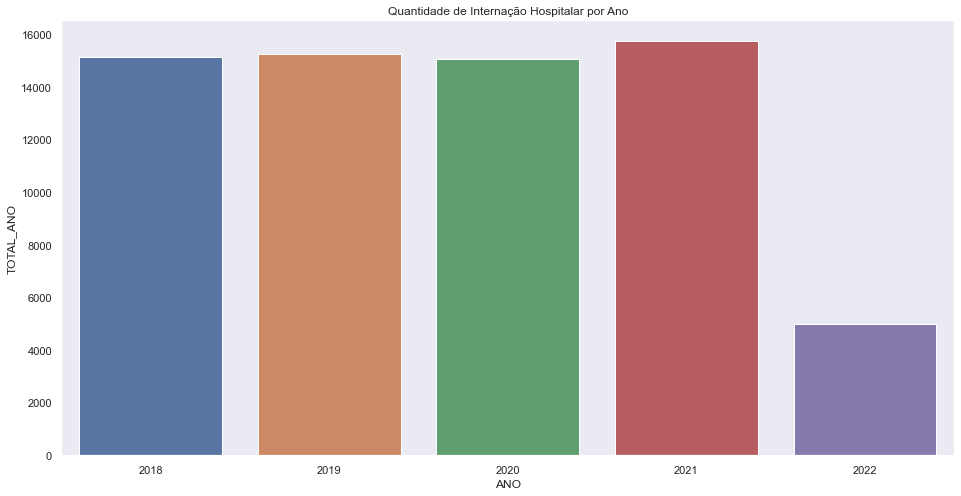

In [195]:
# --- Quantidade de registros por ano. ---
df_ano = consultar_banco(sql='''select 
                                    a."ANO", 
                                    count(*) as "TOTAL_ANO"
                                from sih_sus.tb_sus_sih_qt a
                                    group by a."ANO"
                                        order by a."ANO";''', \
                         colunas=["ANO", "TOTAL_ANO"])

df_ano

sns.set_theme(style="dark")
plt.figure(figsize=(16, 8))

sns.barplot(data=df_ano, x="ANO", y="TOTAL_ANO")


plt.title("Quantidade de Internação Hospitalar por Ano")
plt.show()

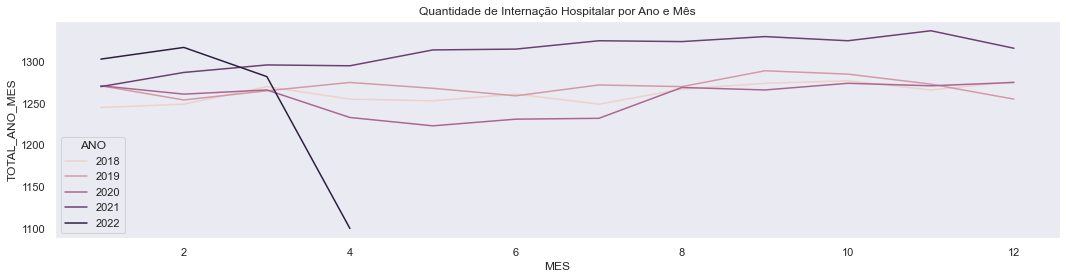

In [191]:
# --- Quantidade de registros por ano. ---
df_ano_mes = consultar_banco(sql='''select 
                                    a."ANO", 
                                    a."MES", 
                                    count(*) as "TOTAL_ANO_MES"
                                from sih_sus.tb_sus_sih_qt a
                                    group by a."ANO", a."MES"
                                        order by a."ANO", a."MES";''', \
                         colunas=["ANO", "MES", "TOTAL_ANO_MES"])

#df_ano_mes

sns.set_theme(style="dark")
plt.figure(figsize=(18, 4))

sns.lineplot(data=df_ano_mes, x="MES", y="TOTAL_ANO_MES", hue="ANO")


plt.title("Quantidade de Internação Hospitalar por Ano e Mês")
plt.show()

In [196]:
df_ano_mes

,ANO,MES,TOTAL_ANO_MES
0,2018,1,1245
1,2018,2,1249
2,2018,3,1270
3,2018,4,1255
4,2018,5,1253
5,2018,6,1261
6,2018,7,1249
7,2018,8,1267
8,2018,9,1274
9,2018,10,1277


C:\Users\Usuario\anaconda3\envs\iesb_pi6\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\Usuario\anaconda3\envs\iesb_pi6\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\Usuario\anaconda3\envs\iesb_pi6\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\Usuario\anaconda3\envs\iesb_pi6\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\Usuario\anaconda3\envs\iesb_pi6\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


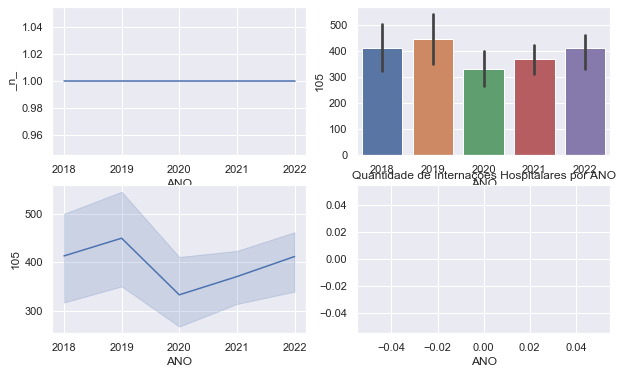

In [131]:
# Definição plotting region (2 rows, 2 columns).
fig, axes = plt.subplots(2,2 , figsize=(10, 6))

sns.lineplot(data=df_qt, x="ANO", y="_n_", ax=axes[0,0])
sns.barplot(data=df_qt, x="ANO", y="105", ax=axes[0,1])
sns.lineplot(data=df_qt, x="ANO", y="105", ax=axes[1,0])
sns.lineplot(data=df_qt, x="ANO", y="112", ax=axes[1,1])

plt.title("Quantidade de Internações Hospitalares por ANO")
plt.show()

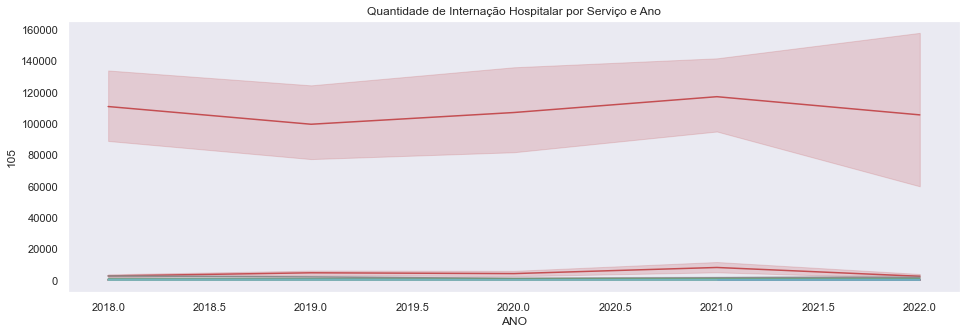

In [156]:
sns.set_theme(style="dark")
plt.figure(figsize=(16, 5))

sns.lineplot(data=df_qt, x="ANO", y="105")
sns.lineplot(data=df_qt, x="ANO", y="107")
sns.lineplot(data=df_qt, x="ANO", y="112")
sns.lineplot(data=df_qt, x="ANO", y="113")
sns.lineplot(data=df_qt, x="ANO", y="114")
sns.lineplot(data=df_qt, x="ANO", y="115")
sns.lineplot(data=df_qt, x="ANO", y="116")
sns.lineplot(data=df_qt, x="ANO", y="117")
sns.lineplot(data=df_qt, x="ANO", y="120")
sns.lineplot(data=df_qt, x="ANO", y="121")
sns.lineplot(data=df_qt, x="ANO", y="122")
sns.lineplot(data=df_qt, x="ANO", y="123")
sns.lineplot(data=df_qt, x="ANO", y="125")
sns.lineplot(data=df_qt, x="ANO", y="126")
sns.lineplot(data=df_qt, x="ANO", y="127")
sns.lineplot(data=df_qt, x="ANO", y="128")
sns.lineplot(data=df_qt, x="ANO", y="131")
sns.lineplot(data=df_qt, x="ANO", y="132")
sns.lineplot(data=df_qt, x="ANO", y="133")
sns.lineplot(data=df_qt, x="ANO", y="134")
sns.lineplot(data=df_qt, x="ANO", y="135")
sns.lineplot(data=df_qt, x="ANO", y="140")
sns.lineplot(data=df_qt, x="ANO", y="142")
sns.lineplot(data=df_qt, x="ANO", y="145")
sns.lineplot(data=df_qt, x="ANO", y="149")
sns.lineplot(data=df_qt, x="ANO", y="151")
sns.lineplot(data=df_qt, x="ANO", y="153")
sns.lineplot(data=df_qt, x="ANO", y="154")
sns.lineplot(data=df_qt, x="ANO", y="155")
sns.lineplot(data=df_qt, x="ANO", y="169")

plt.title("Quantidade de Internação Hospitalar por Serviço e Ano")
plt.show()

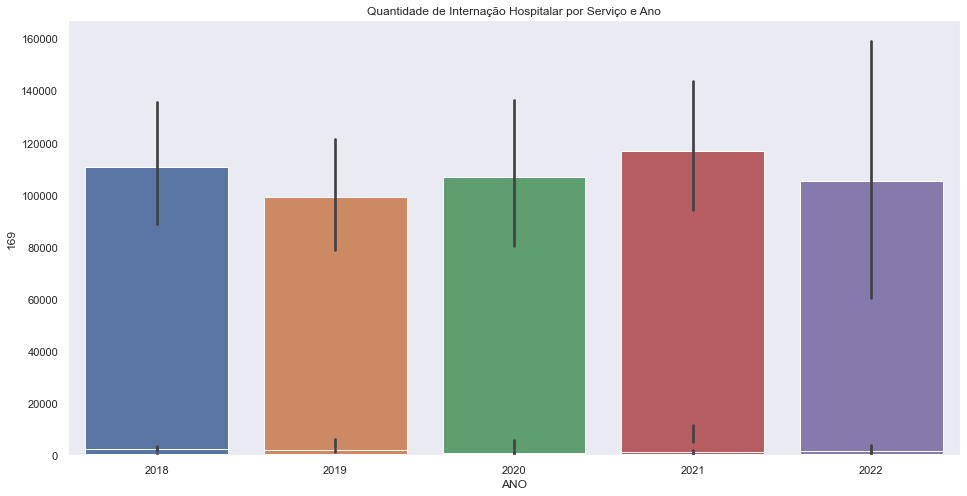

In [160]:
sns.set_theme(style="dark")
plt.figure(figsize=(16, 8))

sns.barplot(data=df_qt, x="ANO", y="105")
sns.barplot(data=df_qt, x="ANO", y="107")
sns.barplot(data=df_qt, x="ANO", y="112")
sns.barplot(data=df_qt, x="ANO", y="113")
sns.barplot(data=df_qt, x="ANO", y="114")
sns.barplot(data=df_qt, x="ANO", y="115")
sns.barplot(data=df_qt, x="ANO", y="116")
sns.barplot(data=df_qt, x="ANO", y="117")
sns.barplot(data=df_qt, x="ANO", y="120")
sns.barplot(data=df_qt, x="ANO", y="121")
sns.barplot(data=df_qt, x="ANO", y="122")
sns.barplot(data=df_qt, x="ANO", y="123")
sns.barplot(data=df_qt, x="ANO", y="125")
sns.barplot(data=df_qt, x="ANO", y="126")
sns.barplot(data=df_qt, x="ANO", y="127")
sns.barplot(data=df_qt, x="ANO", y="128")
sns.barplot(data=df_qt, x="ANO", y="131")
sns.barplot(data=df_qt, x="ANO", y="132")
sns.barplot(data=df_qt, x="ANO", y="133")
sns.barplot(data=df_qt, x="ANO", y="134")
sns.barplot(data=df_qt, x="ANO", y="135")
sns.barplot(data=df_qt, x="ANO", y="140")
sns.barplot(data=df_qt, x="ANO", y="142")
sns.barplot(data=df_qt, x="ANO", y="145")
sns.barplot(data=df_qt, x="ANO", y="149")
sns.barplot(data=df_qt, x="ANO", y="151")
sns.barplot(data=df_qt, x="ANO", y="153")
sns.barplot(data=df_qt, x="ANO", y="154")
sns.barplot(data=df_qt, x="ANO", y="155")
sns.barplot(data=df_qt, x="ANO", y="169")

plt.title("Quantidade de Internação Hospitalar por Serviço e Ano")
plt.show()

In [163]:
a = df_qt.groupby(['ANO'])['105', '107', '112', '113', '114', '115', '116', '117', '120', '121', '122', '123', '125',
       '126', '127', '128', '131', '132', '133', '134', '135', '140', '142',
       '145', '149', '151', '153', '154', '155', '169'].sum()
a.head()

,105,107,112,113,114,115,116,117,120,121,...,135,140,142,145,149,151,153,154,155,169
ANO,,,,,,,,,,,,,,,,,,,,,
2018,7844.0,1063.0,0.0,246231.0,0.0,0.0,5272.0,9917.0,0.0,0.0,...,0.0,0.0,57440.0,0.0,0.0,8544.0,30.0,151.0,15.0,4589.0
2019,9436.0,1553.0,0.0,479110.0,0.0,0.0,5245.0,9557.0,0.0,0.0,...,0.0,0.0,68014.0,0.0,0.0,8194.0,34.0,119.0,204.0,6189.0
2020,4992.0,981.0,0.0,235423.0,0.0,0.0,5792.0,4656.0,0.0,0.0,...,0.0,0.0,47401.0,0.0,0.0,5863.0,8.0,51.0,0.0,6538.0
2021,5555.0,1442.0,0.0,477381.0,0.0,0.0,5315.0,4801.0,0.0,0.0,...,0.0,0.0,63221.0,0.0,0.0,3655.0,7.0,68.0,13.0,4868.0
2022,2058.0,483.0,0.0,37506.0,0.0,0.0,2634.0,850.0,0.0,0.0,...,0.0,0.0,26038.0,0.0,0.0,939.0,3.0,32.0,0.0,1342.0


In [172]:
b = a.transpose()
b.reset_index(inplace=True)
b.rename(columns={'index': 'SERVICO'})
b

ANO,index,2018,2019,2020,2021,2022
0,105,7844.0,9436.0,4992.0,5555.0,2058.0
1,107,1063.0,1553.0,981.0,1442.0,483.0
2,112,0.0,0.0,0.0,0.0,0.0
3,113,246231.0,479110.0,235423.0,477381.0,37506.0
4,114,0.0,0.0,0.0,0.0,0.0
5,115,0.0,0.0,0.0,0.0,0.0
6,116,5272.0,5245.0,5792.0,5315.0,2634.0
7,117,9917.0,9557.0,4656.0,4801.0,850.0
8,120,0.0,0.0,0.0,0.0,0.0
9,121,0.0,0.0,0.0,0.0,0.0


In [176]:
sns.set_theme(style="dark")
plt.figure(figsize=(16, 8))

sns.lineplot(data=b, x="2018", y="SERVICO")
# sns.lineplot(data=b, x="SERVICO", y="2019")
# sns.lineplot(data=b, x="SERVICO", y="2020")
# sns.lineplot(data=b, x="SERVICO", y="2021")
# sns.lineplot(data=b, x="SERVICO", y="2022")


plt.title("Quantidade de Internação Hospitalar por Serviço e Ano")
plt.show()

ValueError: Could not interpret value `2018` for parameter `x`

<Figure size 1152x576 with 0 Axes>

## Referências
- https://python-visualization.github.io/folium/quickstart.html
- https://www.youtube.com/watch?v=jZJ8ASTtuX8
- https://geopandas.org/en/stable/gallery/choropleths.html
- https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html
- https://geopandas.org/en/stable/gallery/plotting_basemap_background.html
- https://geopandas.org/en/stable/gallery/index.html
- https://plotly.com/python/#maps
- https://www.psycopg.org/docs/advanced.html#subclassing-connection
- https://www.psycopg.org/docs/module.html#psycopg2.connect
- https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac
- https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f
- https://saude.rs.gov.br/upload/arquivos/202201/28162312-demonstrativo-de-aihs-aprovadas.pdf
- https://www.scielo.br/j/rgenf/a/x9YbtHDCGJk4NfPpNrz8dwN/?lang=pt#
- https://ces.ibge.gov.br/base-de-dados/links-base-de-dados.html
- http://sihd.datasus.gov.br/principal/index.php
- http://scielo.iec.gov.br/scielo.php?script=sci_arttext&pid=S0104-16732000000500001
- https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/
- http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/sxuf.def